<a href="https://colab.research.google.com/github/choi-yh/DataMining/blob/master/6_1_cnnToyImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


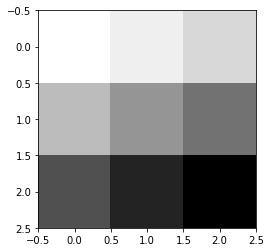

In [0]:
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)

print(image.shape) # 처음 1은 한 장, 3,3은 3 by 3 픽셀, 마지막 1은 1 color를 의미

plt.imshow(image.reshape(3, 3), cmap='Greys')
plt.show()

In [0]:
weight = tf.constant([[[[1.]], [[1.]]],
                       [[[1.]], [[1.]]]])
print('weight shape: ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.numpy()
print("conv2d_img.shape: ", conv2d_img, conv2d_img.shape)

weight shape:  (2, 2, 1, 1)
conv2d_img.shape:  [[[[12.]
   [16.]]

  [[24.]
   [28.]]]] (1, 2, 2, 1)


In [0]:
# 이미지가 color인 경우

image = np.array([[[[1,1,1], [2,2,2], [3,3,3]],
                   [[4,4,4], [5,5,5], [6,6,6]],
                  [[7,7,7], [8,8,8], [9,9,9]]]])
print('image.shape: ', image.shape)

weight = tf.constant([[[[1.],[1.],[1.]], [[1.],[1.],[1.]]],
                       [[[1.],[1.],[1.]], [[1.],[1.],[1.]]]])
print('weight.shape: ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.numpy()
print("conv2d_img.shape: ", conv2d_img)

image.shape:  (1, 3, 3, 3)
weight.shape:  (2, 2, 3, 1)
conv2d_img.shape:  [[[[36.]
   [48.]]

  [[72.]
   [84.]]]]


weight.shape:  (2, 2, 1, 3)
conv2d_img [[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
one_img.reshape(3,3):  [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


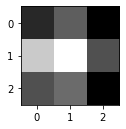

one_img.reshape(3,3):  [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


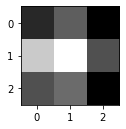

one_img.reshape(3,3):  [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


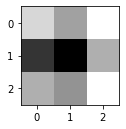

In [0]:
# Convolutional Layer 층을 여러 개로 하기 위해서는 weight를 여러 개 주면 된다.

image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)

weight = tf.constant([[[[1.,10.,-1.]], [[1.,10.,-1.]]],
                       [[[1.,10.,-1.]], [[1., 10., -1.]]]])
print('weight.shape: ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.numpy()
print("conv2d_img", conv2d_img)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print('one_img.reshape(3,3): ', one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()